WEB SCRAPING AND EXPLORATORY DATA ANALYSIS

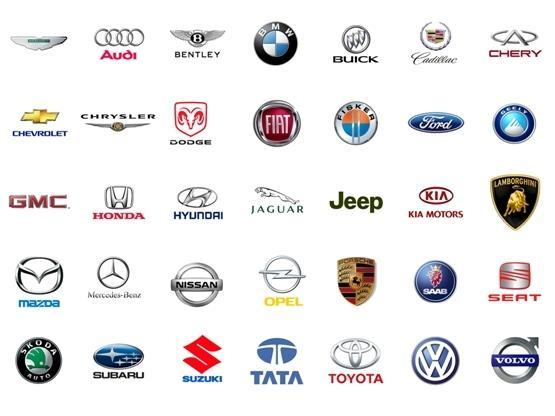


Extracted data on used cars listed for sale across various cities in India from the 'cartrade.com' website. Selected data from five cities and downloaded it as CSV files. After cleaning and organizing the data using the NumPy, and Pandas libraries, Conducted data analysis using Matplotlib and Seaborn libraries. The analysis yielded valuable insights.
(Codes regarding the extraction of the city data can be found in the respective city files.)

In [1]:
#IMPORT LIBRARIES
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time


In [2]:
pd.read_csv("HYDERABAD_DATA")

,Unnamed: 0,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000
1,1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000
2,2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000
3,3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800
4,4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000
...,...,...,...,...,...,...,...,...
599,599,Hyundai,Elite i20 Asta 1.4 CRDI [2016-2017],Hyderabad,Diesel,96878,2018,791000
600,600,Maruti Suzuki,Ciaz Delta 1.4 AT,Hyderabad,Petrol,35943,2017,730000
601,601,Nissan,Micra Active XL O,Hyderabad,Petrol,45469,2018,488000
602,602,Nissan,Magnite XV Premium Turbo [2020],Hyderabad,Petrol,8857,2021,928000


In [3]:
HYDERABAD_DATA_df = pd.read_csv("HYDERABAD_DATA")

In [4]:
HYDERABAD_DATA_df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
HYDERABAD_DATA_df

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000
...,...,...,...,...,...,...,...
599,Hyundai,Elite i20 Asta 1.4 CRDI [2016-2017],Hyderabad,Diesel,96878,2018,791000
600,Maruti Suzuki,Ciaz Delta 1.4 AT,Hyderabad,Petrol,35943,2017,730000
601,Nissan,Micra Active XL O,Hyderabad,Petrol,45469,2018,488000
602,Nissan,Magnite XV Premium Turbo [2020],Hyderabad,Petrol,8857,2021,928000


In [6]:
MUMBAI_DATA_df = pd.read_csv("MUMBAI_DATA")

In [7]:
MUMBAI_DATA_df

,Unnamed: 0,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,0,Honda,Jazz VX Petrol,Mumbai,Petrol,53318,2015,525000
1,1,Mercedes-Benz,GLC 200 Progressive,Mumbai,Petrol,5000,2022,6250000
2,2,Tata,Tiago Revotron XZ,Mumbai,Petrol,41407,2018,465000
3,3,Honda,City VX CVT,Mumbai,Petrol,34067,2016,735000
4,4,BMW,X3 xDrive20d,Mumbai,Diesel,16000,2011,1699000
...,...,...,...,...,...,...,...,...
592,592,Tata,Altroz XZ (O) Diesel,Mumbai,Diesel,43444,2021,991000
593,593,Ford,EcoSport Titanium 1.5L Ti-VCT,Mumbai,Petrol,18014,2019,853000
594,594,Hyundai,i20 Asta 1.2,Mumbai,Petrol,13616,2014,488000
595,595,Hyundai,Elite i20 Magna 1.2 [2016-2017],Mumbai,Petrol,20782,2016,531000


In [8]:
MUMBAI_DATA_df.drop('Unnamed: 0',axis=1,inplace= True)

In [9]:
MUMBAI_DATA_df

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Honda,Jazz VX Petrol,Mumbai,Petrol,53318,2015,525000
1,Mercedes-Benz,GLC 200 Progressive,Mumbai,Petrol,5000,2022,6250000
2,Tata,Tiago Revotron XZ,Mumbai,Petrol,41407,2018,465000
3,Honda,City VX CVT,Mumbai,Petrol,34067,2016,735000
4,BMW,X3 xDrive20d,Mumbai,Diesel,16000,2011,1699000
...,...,...,...,...,...,...,...
592,Tata,Altroz XZ (O) Diesel,Mumbai,Diesel,43444,2021,991000
593,Ford,EcoSport Titanium 1.5L Ti-VCT,Mumbai,Petrol,18014,2019,853000
594,Hyundai,i20 Asta 1.2,Mumbai,Petrol,13616,2014,488000
595,Hyundai,Elite i20 Magna 1.2 [2016-2017],Mumbai,Petrol,20782,2016,531000


In [12]:
CHENNAI_DATA_df = pd.read_csv("CHENNAI_DATA")

In [13]:
CHENNAI_DATA_df

,Unnamed: 0,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,0,Hyundai,Grand i10 Sportz (O) 1.2 Kappa VTVT [2017-2018],Chennai,Petrol,46479,2017,534000
1,1,Jeep,Compass Limited 2.0 Diesel [2017-2020],Chennai,Diesel,59700,2018,1590000
2,2,Audi,Q3 35 TDI Premium,Chennai,Diesel,11500,2013,1380000
3,3,Datsun,redi-GO T(O) 1.0,Chennai,Petrol,23003,2019,341000
4,4,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Chennai,Diesel,14000,2020,12800
...,...,...,...,...,...,...,...,...
601,603,Land Rover,Range Rover 3.0 V6 Diesel Vogue LWB,Chennai,Diesel,23000,2019,23000
602,604,Maruti Suzuki,Swift Dzire VXI,Chennai,Petrol,58789,2016,598000
603,605,Toyota,Etios Liva G,Chennai,Petrol,66370,2011,328000
604,606,Renault,Captur RXE Diesel,Chennai,Diesel,88903,2019,825000


In [14]:
CHENNAI_DATA_df.drop('Unnamed: 0',axis=1,inplace= True)

In [15]:
CHENNAI_DATA_df

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Hyundai,Grand i10 Sportz (O) 1.2 Kappa VTVT [2017-2018],Chennai,Petrol,46479,2017,534000
1,Jeep,Compass Limited 2.0 Diesel [2017-2020],Chennai,Diesel,59700,2018,1590000
2,Audi,Q3 35 TDI Premium,Chennai,Diesel,11500,2013,1380000
3,Datsun,redi-GO T(O) 1.0,Chennai,Petrol,23003,2019,341000
4,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Chennai,Diesel,14000,2020,12800
...,...,...,...,...,...,...,...
601,Land Rover,Range Rover 3.0 V6 Diesel Vogue LWB,Chennai,Diesel,23000,2019,23000
602,Maruti Suzuki,Swift Dzire VXI,Chennai,Petrol,58789,2016,598000
603,Toyota,Etios Liva G,Chennai,Petrol,66370,2011,328000
604,Renault,Captur RXE Diesel,Chennai,Diesel,88903,2019,825000


In [16]:
pd.read_csv("DELHI_DATA")

,Unnamed: 0,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,0,Land Rover,Range Rover Velar 2.0 R-Dynamic SE Petrol 250,Delhi,Petrol,29000,2020,8500000
1,1,Skoda,Superb Style TSI AT,Delhi,Petrol,52000,2019,2070000
2,2,Toyota,Innova Crysta 2.4 VX 7 STR [2016-2020],Delhi,Diesel,50043,2017,1625000
3,3,Maruti Suzuki,Alto K10 LXi CNG,Delhi,CNG,65065,2019,393000
4,4,Land Rover,Range Rover 4.4 SDV8 Vogue SE,Delhi,Diesel,18000,2013,2750000
...,...,...,...,...,...,...,...,...
596,596,Honda,City VX (O) MT,Delhi,Petrol,42707,2014,625000
597,597,Skoda,Rapid 1.5 TDI CR Ambition AT,Delhi,Diesel,51631,2018,790000
598,598,Honda,City V CVT Petrol [2017-2019],Delhi,Petrol,39969,2017,865000
599,599,Maruti Suzuki,Wagon R 1.0 LX,Delhi,Petrol,18514,2017,400000


In [17]:
DELHI_DATA_df = pd.read_csv("DELHI_DATA")

In [18]:
DELHI_DATA_df.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
DELHI_DATA_df

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Land Rover,Range Rover Velar 2.0 R-Dynamic SE Petrol 250,Delhi,Petrol,29000,2020,8500000
1,Skoda,Superb Style TSI AT,Delhi,Petrol,52000,2019,2070000
2,Toyota,Innova Crysta 2.4 VX 7 STR [2016-2020],Delhi,Diesel,50043,2017,1625000
3,Maruti Suzuki,Alto K10 LXi CNG,Delhi,CNG,65065,2019,393000
4,Land Rover,Range Rover 4.4 SDV8 Vogue SE,Delhi,Diesel,18000,2013,2750000
...,...,...,...,...,...,...,...
596,Honda,City VX (O) MT,Delhi,Petrol,42707,2014,625000
597,Skoda,Rapid 1.5 TDI CR Ambition AT,Delhi,Diesel,51631,2018,790000
598,Honda,City V CVT Petrol [2017-2019],Delhi,Petrol,39969,2017,865000
599,Maruti Suzuki,Wagon R 1.0 LX,Delhi,Petrol,18514,2017,400000


In [20]:
BNG_DATA_df = pd.read_csv("BNG_DATA")

In [21]:
BNG_DATA_df.drop('Unnamed: 0',axis=1,inplace=True)

In [22]:
BNG_DATA_df

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Audi,Q5 Technology 45 TFSI,Bangalore,Petrol,9830,2022,6000000
1,Audi,A4 1.8 TFSI,Bangalore,Petrol,39643,2011,1075000
2,BMW,X1 sDrive20d,Bangalore,Diesel,33000,2013,1775000
3,Toyota,Innova Crysta ZX 2.4 AT 7 STR,Bangalore,Diesel,45000,2021,2950000
4,Hyundai,Creta E Plus 1.6 Petrol,Bangalore,Petrol,37581,2018,955000
...,...,...,...,...,...,...,...
603,Maruti Suzuki,Swift DZire ZXI,Bangalore,Petrol,52658,2016,699000
604,Maruti Suzuki,Wagon R ZXi 1.2 AMT,Bangalore,Petrol,22324,2020,679000
605,Mercedes-Benz,C-Class C220d Prime,Bangalore,Diesel,21439,2019,4075000
606,Maruti Suzuki,S-Cross Zeta AT,Bangalore,Petrol,19254,2021,1249000


In [23]:
CITIES_DATA = pd.concat([HYDERABAD_DATA_df,MUMBAI_DATA_df,CHENNAI_DATA_df,DELHI_DATA_df,BNG_DATA_df],axis=0)

In [24]:
CITIES_DATA

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000
...,...,...,...,...,...,...,...
603,Maruti Suzuki,Swift DZire ZXI,Bangalore,Petrol,52658,2016,699000
604,Maruti Suzuki,Wagon R ZXi 1.2 AMT,Bangalore,Petrol,22324,2020,679000
605,Mercedes-Benz,C-Class C220d Prime,Bangalore,Diesel,21439,2019,4075000
606,Maruti Suzuki,S-Cross Zeta AT,Bangalore,Petrol,19254,2021,1249000


In [25]:
CITIES_DATA = CITIES_DATA.reset_index(drop=True)

In [26]:
CITIES_DATA

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000
...,...,...,...,...,...,...,...
3011,Maruti Suzuki,Swift DZire ZXI,Bangalore,Petrol,52658,2016,699000
3012,Maruti Suzuki,Wagon R ZXi 1.2 AMT,Bangalore,Petrol,22324,2020,679000
3013,Mercedes-Benz,C-Class C220d Prime,Bangalore,Diesel,21439,2019,4075000
3014,Maruti Suzuki,S-Cross Zeta AT,Bangalore,Petrol,19254,2021,1249000


In [34]:
CITIES_DATA.iloc[290]

Brand                                             Ford
Model                 EcoSport Titanium 1.5 TDCi (Opt)
City                                         Hyderabad
Fuel_type                                       Diesel
Kilometers_Driven                                79681
Year                                              2015
Price                                           640000
Name: 290, dtype: object

In [35]:
CITIES_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              3016 non-null   object
 1   Model              3016 non-null   object
 2   City               3016 non-null   object
 3   Fuel_type          3016 non-null   object
 4   Kilometers_Driven  3016 non-null   int64 
 5   Year               3016 non-null   int64 
 6   Price              3016 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 165.1+ KB


In [36]:
CITIES_DATA.duplicated().sum()

2579

In [37]:
CITIES_DATA.duplicated

<bound method DataFrame.duplicated of               Brand                               Model       City Fuel_type  \
0           Hyundai                  Elite i20 Asta 1.2  Hyderabad    Petrol   
1     Mercedes-Benz                   CLA 200 CDI Sport  Hyderabad    Diesel   
2     Maruti Suzuki                     Wagon R 1.0 VXI  Hyderabad    Petrol   
3     Mercedes-Benz   S-Class (W222) S 350D [2018-2020]  Hyderabad    Diesel   
4     Maruti Suzuki                     Wagon R 1.0 VXi  Hyderabad    Petrol   
...             ...                                 ...        ...       ...   
3011  Maruti Suzuki                     Swift DZire ZXI  Bangalore    Petrol   
3012  Maruti Suzuki                 Wagon R ZXi 1.2 AMT  Bangalore    Petrol   
3013  Mercedes-Benz                 C-Class C220d Prime  Bangalore    Diesel   
3014  Maruti Suzuki                     S-Cross Zeta AT  Bangalore    Petrol   
3015          Honda                              City V  Bangalore    Petrol   

 

In [38]:
print(CITIES_DATA['Kilometers_Driven'].nunique())

358


In [39]:
print(CITIES_DATA['Price'].nunique())

317


In [40]:
Unique_rows = CITIES_DATA.drop_duplicates()

In [41]:
Unique_rows

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000
...,...,...,...,...,...,...,...
2890,Ford,EcoSport Titanium 1.5L Ti-VCT,Bangalore,Petrol,33175,2018,899000
2892,Land Rover,Range Rover Evoque S [2020-2021],Bangalore,Diesel,36500,2021,7999000
2895,Tata,Harrier XZA Plus,Bangalore,Diesel,19963,2021,2250000
2927,Honda,City SV CVT,Bangalore,Petrol,63213,2016,765000


In [42]:
Unique_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 2991
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              437 non-null    object
 1   Model              437 non-null    object
 2   City               437 non-null    object
 3   Fuel_type          437 non-null    object
 4   Kilometers_Driven  437 non-null    int64 
 5   Year               437 non-null    int64 
 6   Price              437 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 27.3+ KB


In [43]:
print(Unique_rows['Kilometers_Driven'].nunique())

358


In [44]:
Unique_rows.head(60)

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000
5,Tata,Tiago Revotron XZA [2017-2019],Hyderabad,Petrol,33742,2017,530000
6,Volvo,S90 Inscription D4 [2016-2020],Hyderabad,Diesel,68536,2018,4000000
7,Tata,Tiago Revotron XZA [2017-2019],Hyderabad,Petrol,65323,2017,460000
8,Hyundai,i20 Sportz 1.2 IVT,Hyderabad,Petrol,75806,2020,878000
9,Maruti Suzuki,Celerio ZXi (Opt) [2017-2019],Hyderabad,Petrol,90178,2018,485000


In [45]:
Unique_rows[Unique_rows['Brand'].isna()]

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price


In [46]:
df_ct= Unique_rows.dropna(axis=0)

In [47]:
df_ct

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000
...,...,...,...,...,...,...,...
2890,Ford,EcoSport Titanium 1.5L Ti-VCT,Bangalore,Petrol,33175,2018,899000
2892,Land Rover,Range Rover Evoque S [2020-2021],Bangalore,Diesel,36500,2021,7999000
2895,Tata,Harrier XZA Plus,Bangalore,Diesel,19963,2021,2250000
2927,Honda,City SV CVT,Bangalore,Petrol,63213,2016,765000


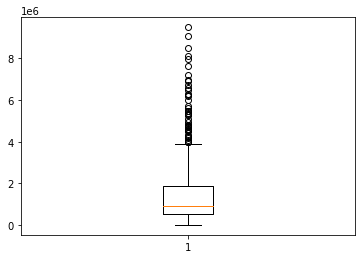

In [48]:
plt.boxplot(df_ct["Price"])
plt.show()

In [49]:
df_ct["Price"].skew()

2.0376478665628017

In [50]:
df_ct

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000
...,...,...,...,...,...,...,...
2890,Ford,EcoSport Titanium 1.5L Ti-VCT,Bangalore,Petrol,33175,2018,899000
2892,Land Rover,Range Rover Evoque S [2020-2021],Bangalore,Diesel,36500,2021,7999000
2895,Tata,Harrier XZA Plus,Bangalore,Diesel,19963,2021,2250000
2927,Honda,City SV CVT,Bangalore,Petrol,63213,2016,765000


In [51]:
Driven_Years = 2023- df_ct['Year']

In [52]:
df_ct.insert(loc=7,column='Driven_Years',value=Driven_Years)

In [53]:
df_ct

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000,6
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000,7
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000,6
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800,2
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000,10
...,...,...,...,...,...,...,...,...
2890,Ford,EcoSport Titanium 1.5L Ti-VCT,Bangalore,Petrol,33175,2018,899000,5
2892,Land Rover,Range Rover Evoque S [2020-2021],Bangalore,Diesel,36500,2021,7999000,2
2895,Tata,Harrier XZA Plus,Bangalore,Diesel,19963,2021,2250000,2
2927,Honda,City SV CVT,Bangalore,Petrol,63213,2016,765000,7


In [54]:
df_ct[df_ct['Price']<100000]

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800,2
577,Mercedes-Benz,S-Class (W222) S 450,Hyderabad,Petrol,6200,2021,19500,2
1108,Land Rover,Range Rover Sport SE 3.0 Diesel [2018-2020],Mumbai,Diesel,30000,2019,13500,4
1205,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Chennai,Diesel,14000,2020,12800,3
1206,Bentley,Continental Flying Spur Sedan,Chennai,Petrol,23000,2012,11500,11
1211,Bentley,Continental GT V8,Chennai,Petrol,24000,2011,11500,12
1218,Lamborghini,Urus Twin-Turbo V8,Chennai,Petrol,16000,2020,42500,3
1228,Land Rover,Range Rover 3.0 V6 Diesel Vogue LWB,Chennai,Diesel,23000,2019,23000,4
2031,Land Rover,Range Rover Sport SDV6 SE,Delhi,Diesel,48000,2019,11000,4
2285,Land Rover,Range Rover 3.0 V6 Petrol Vogue,Delhi,Petrol,52000,2018,14000,5


In [ ]:
#DF = df_ct[df_ct['Price']>100000]

In [55]:
DF=df_ct

In [56]:
DF = DF.reset_index(drop=True)

In [57]:
DF

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000,6
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000,7
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000,6
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800,2
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000,10
...,...,...,...,...,...,...,...,...
432,Ford,EcoSport Titanium 1.5L Ti-VCT,Bangalore,Petrol,33175,2018,899000,5
433,Land Rover,Range Rover Evoque S [2020-2021],Bangalore,Diesel,36500,2021,7999000,2
434,Tata,Harrier XZA Plus,Bangalore,Diesel,19963,2021,2250000,2
435,Honda,City SV CVT,Bangalore,Petrol,63213,2016,765000,7


In [58]:
DF.isna().sum()

Brand                0
Model                0
City                 0
Fuel_type            0
Kilometers_Driven    0
Year                 0
Price                0
Driven_Years         0
dtype: int64

In [59]:
DF.to_csv("CARS_DATA_ALLCITIES")

In [60]:
Data = pd.read_csv("CARS_DATA_ALLCITIES")

In [61]:
Data

,Unnamed: 0,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
0,0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000,6
1,1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000,7
2,2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000,6
3,3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800,2
4,4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000,10
...,...,...,...,...,...,...,...,...,...
432,432,Ford,EcoSport Titanium 1.5L Ti-VCT,Bangalore,Petrol,33175,2018,899000,5
433,433,Land Rover,Range Rover Evoque S [2020-2021],Bangalore,Diesel,36500,2021,7999000,2
434,434,Tata,Harrier XZA Plus,Bangalore,Diesel,19963,2021,2250000,2
435,435,Honda,City SV CVT,Bangalore,Petrol,63213,2016,765000,7


In [62]:
Data.drop('Unnamed: 0',axis=1,inplace= True)

In [63]:
Data

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000,6
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000,7
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000,6
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800,2
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000,10
...,...,...,...,...,...,...,...,...
432,Ford,EcoSport Titanium 1.5L Ti-VCT,Bangalore,Petrol,33175,2018,899000,5
433,Land Rover,Range Rover Evoque S [2020-2021],Bangalore,Diesel,36500,2021,7999000,2
434,Tata,Harrier XZA Plus,Bangalore,Diesel,19963,2021,2250000,2
435,Honda,City SV CVT,Bangalore,Petrol,63213,2016,765000,7


In [64]:
Data.describe()



,Kilometers_Driven,Year,Price,Driven_Years
count,437.000000,437.000000,4.370000e+02,437.000000
mean,42586.542334,2017.327231,1.596067e+06,5.672769
std,24269.299736,2.953852,1.686497e+06,2.953852
min,1100.000000,2008.000000,1.060000e+04,1.000000
25%,22000.000000,2015.000000,5.500000e+05,3.000000
50%,40983.000000,2018.000000,8.990000e+05,5.000000
75%,61072.000000,2020.000000,1.900000e+06,8.000000
max,98477.000000,2022.000000,9.500000e+06,15.000000


The average km_ driven by the cars put on sale is 43,085kms
The avaerage price of cars put on sale is 17Lakhs
The minimum price of cars sold is 185000


In [ ]:
#univariate analysis

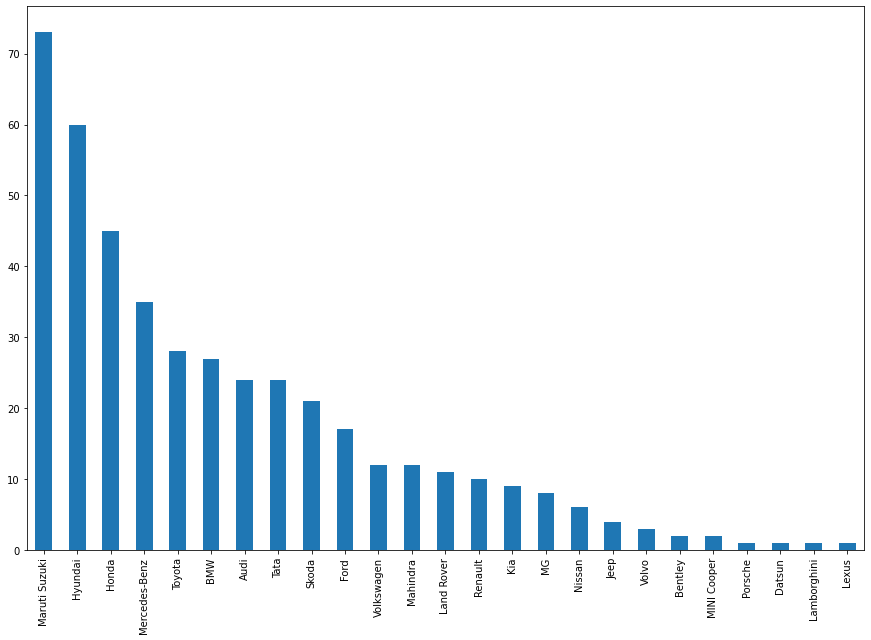

In [70]:
plt.figure(figsize=(15,10))
Data['Brand'].value_counts().plot(kind='bar')
plt.show()

INSIGHTS: The highest number of cars put for sale in wesite is of maruti brand cars
Hyundai cars are set in second position for sale
Mercedes-benz cars are set in fourth position

<AxesSubplot:xlabel='Kilometers_Driven'>

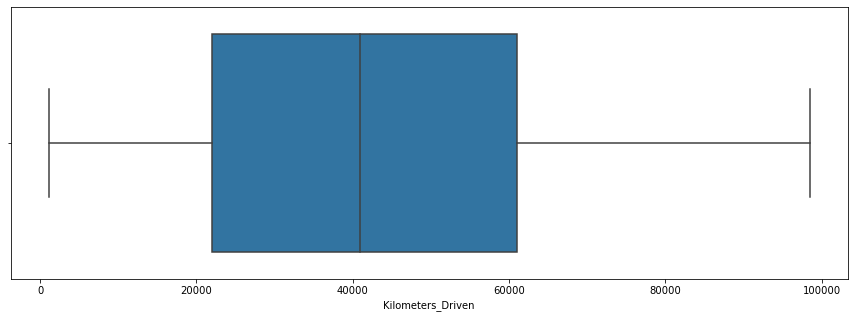

In [134]:
plt.figure(figsize=(15,5))
sns.boxplot(Data['Kilometers_Driven'])

INSIGHTS:The range of kilometers travelled by cars that are in sale is from 20,000  to 60,000kms.Mean Distance travelled by cars in the data is 40,000KMs

In [73]:
Data.City.value_counts()

Mumbai       114
Delhi        108
Bangalore     79
Chennai       70
Hyderabad     66
Name: City, dtype: int64

Compared to other cities  people,hyd and chennai people maybe relying on public transport whereas major cities people are  likelyVtowards using own transport

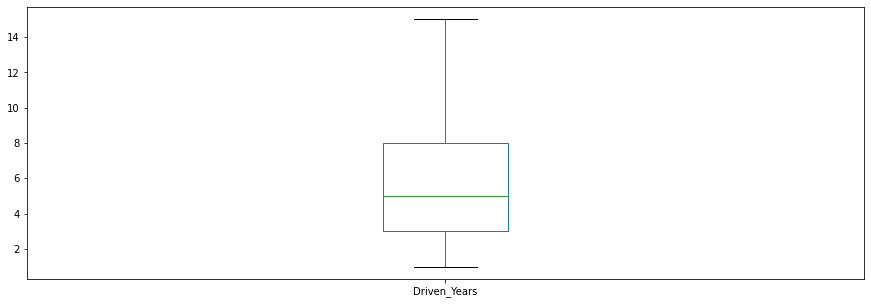

In [78]:

plt.figure(figsize=(15,5))
Data['Driven_Years'].plot(kind='box')
plt.show()

INSIGHTS : The cars that are in sale have average Driven/used years as 5years

<AxesSubplot:xlabel='Fuel_type', ylabel='count'>

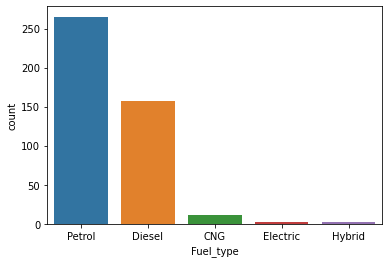

In [76]:
sns.countplot(Data['Fuel_type'])

In [ ]:
INSIGHTS : More number of petrol cars are available for sale.Hybrid cars are least available for sale

<AxesSubplot:xlabel='City', ylabel='count'>

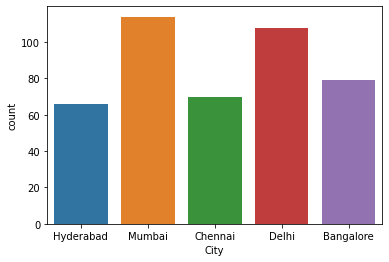

In [135]:
sns.countplot(Data['City'])

INSIGHTS : More number of cars are for sale in Mumbai and Delhi.Compared to other cities  people,hyd and chennai people maybe relying on public transport whereas major cities people are  likelyVtowards using own transport

## BIVARIATE


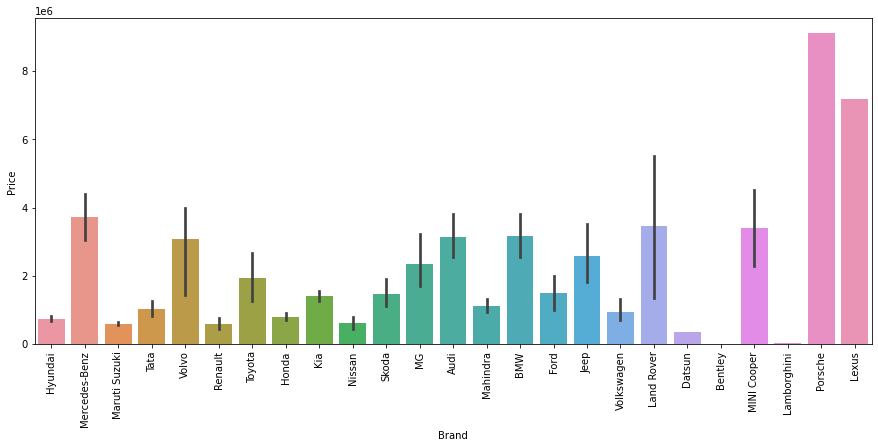

In [82]:
#Plot1_BI= Data.sort_values(by=['Brand'],ascending = False)    #BRAND,PRICE---- CAT,NUM
plt.figure(figsize=(15,6))
sns.barplot(x=Data.Brand,y=Data.Price)
plt.xticks(rotation=90)
plt.show()

INSIGHTS : The costliest ones are the Porsche,Lexus,Volvo,Landrover cars
The Cars which are in low budget are hyundai,maruti suzuki cars

<AxesSubplot:xlabel='Brand', ylabel='count'>

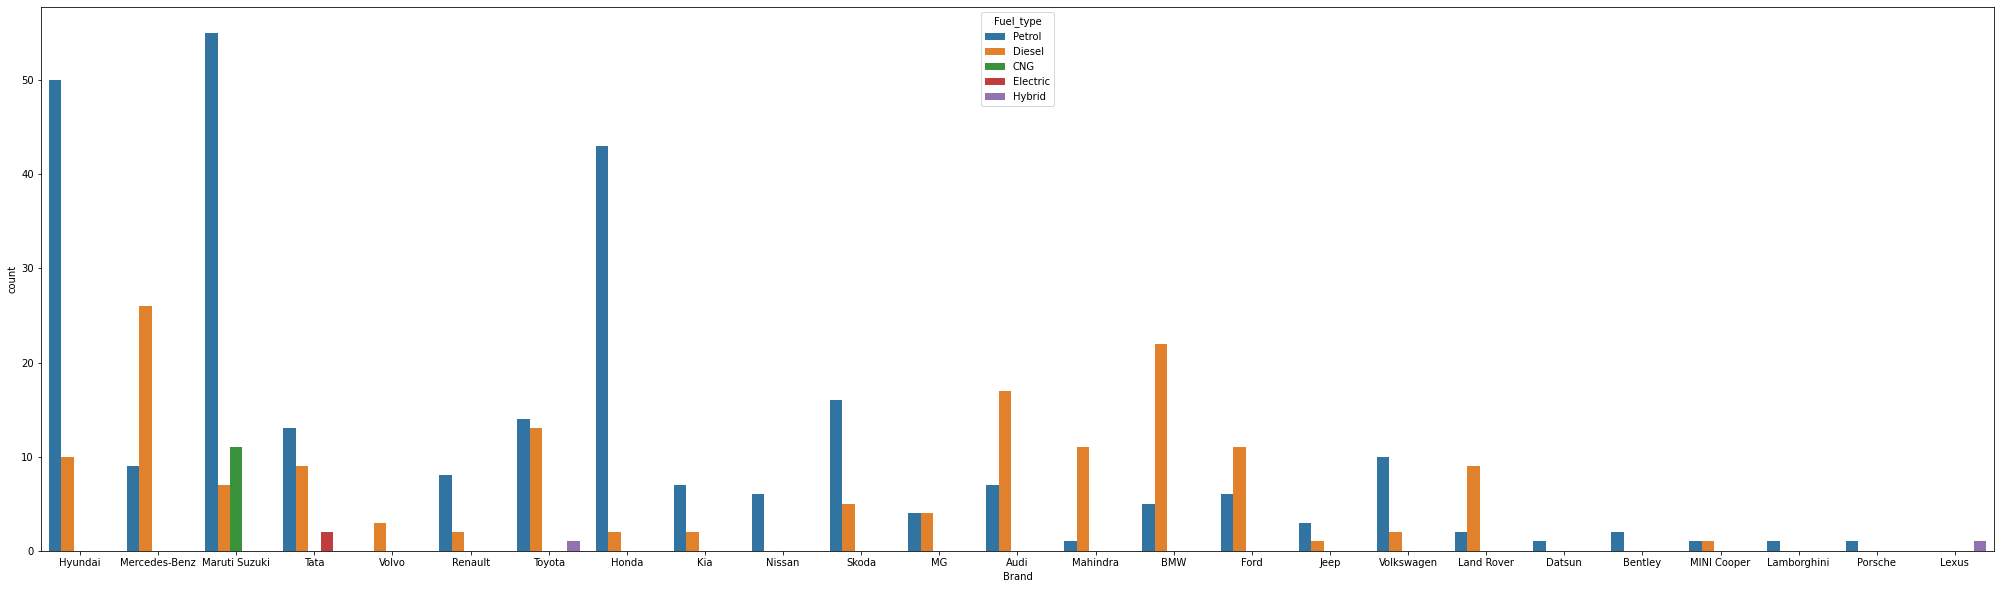

In [99]:
plt.figure(figsize=(35,10))
sns.countplot(x = "Brand",data = Data, hue="Fuel_type")  ###CAT,CAT -- COUNT PLOT

INSIGHTS : IN HYUNDAI AND MARUTI,MORE NO OF PETROL CARS ARE FOR SALE
ELECTRIC TYPE CARS ARE FOUND IN  MG,TATA,BENZ,MINI COOPER CARS 
LP & CNG are available in Hyundai Brand
Hybrid type are found in Lexus and Toyota cars which are in sale



<AxesSubplot:xlabel='Fuel_type', ylabel='Price'>

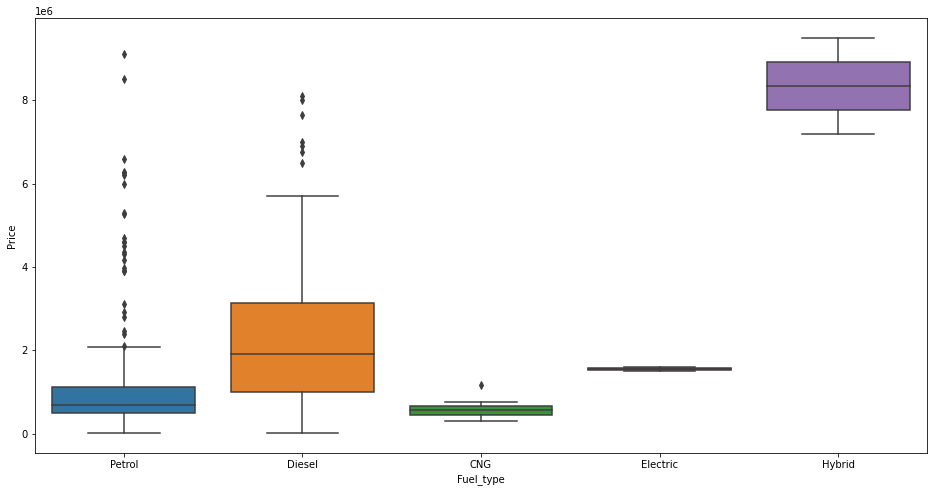

In [103]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "Fuel_type", y = "Price", data = Data)


INSIGHTS : By the above graph we can observe that,Hybrid cars are costliest cars. The Diesel cars are costlier gthan petrol cars


In [104]:
Data[Data['Fuel_type']=='Hybrid']

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
257,Toyota,Vellfire Hybrid,Delhi,Hybrid,36000,2020,9500000,3
336,Lexus,ES 300h Luxury,Delhi,Hybrid,4290,2022,7190000,1


In [105]:
Data[Data['Fuel_type']=='Electric']

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
40,Tata,Nexon EV XZ Plus,Hyderabad,Electric,22000,2021,1590000,2
102,Tata,Nexon EV XZ Plus,Mumbai,Electric,12000,2020,1499000,3


In [107]:
Data_2= pd.crosstab(Data.Brand,Data.City)

In [108]:
Data_2    #BRANDS IN CITIES

City,Bangalore,Chennai,Delhi,Hyderabad,Mumbai
Brand,,,,,
Audi,8,7,4,1,4
BMW,4,7,7,2,7
Bentley,0,2,0,0,0
Datsun,0,1,0,0,0
Ford,4,1,6,1,5
Honda,10,2,12,3,18
Hyundai,10,8,12,15,15
Jeep,0,2,1,1,0
Kia,1,1,5,1,1


In [ ]:
sns.pairplot(Data_2)
plt.show()

## MULTIVARIATE ANALYSIS

In [ ]:
pd.pivot_table(Data,index=['Brand'],aggfunc={'Kilometers_Driven' : [min,max,np.mean],'Price' : [min,max,np.mean],'Year':np.mean})

<AxesSubplot:>

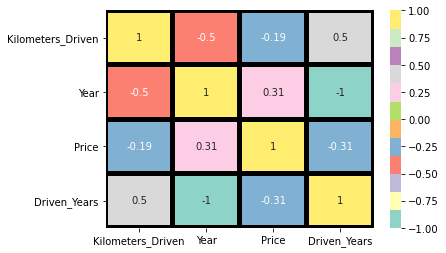

In [109]:
sns.heatmap(Data.corr(),annot=True,cmap="Set3",linecolor="black",linewidth=4)

   
INSIGHTS: Price and Car Driven years have negative co-relation ,Price and Year of Registration have positive co-relation

<AxesSubplot:xlabel='Year', ylabel='Price'>

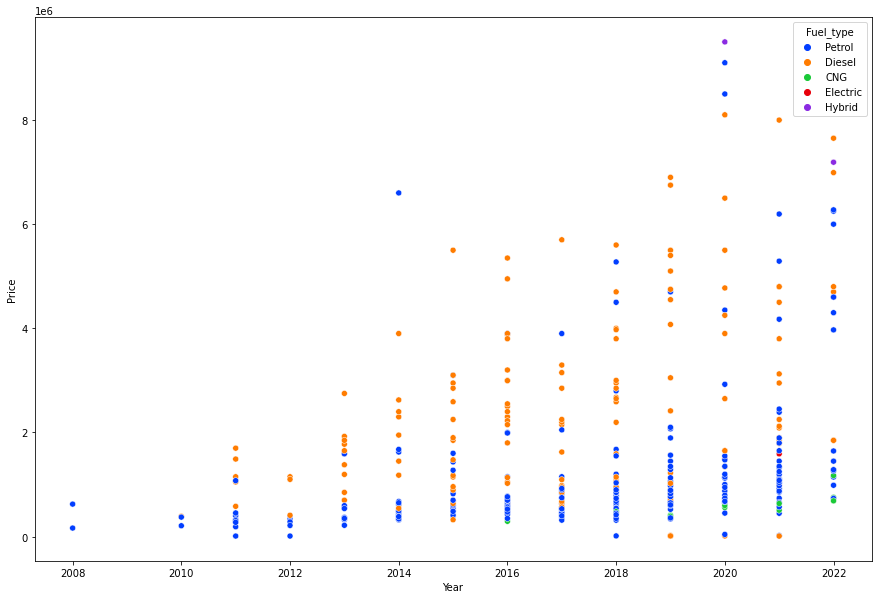

In [110]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Year',y='Price',data=Data,palette='bright',hue='Fuel_type')


INSIGHTS : Overall, We can observe that prices of diesel cars are somewhat higher than the petrol cars in the respective registered cars of particular year.



# NON VISUALIZATION DATA ANALYSIS

In [111]:
Data_City = pd.pivot_table(Data,index=['City'],aggfunc={'Kilometers_Driven' : [min,max,np.mean],'Price' : [min,max,np.mean],'Year':np.mean})

In [112]:
Data_City

Kilometers_Driven                            Price                \
                        max          mean     min        max          mean   
City                                                                         
Bangalore           97854.0  41127.936709  8838.0  7999000.0  1.590628e+06   
Chennai             97684.0  44680.700000  1346.0  6600000.0  1.729158e+06   
Delhi               96107.0  43136.685185  1100.0  9500000.0  1.879728e+06   
Hyderabad           96878.0  46884.893939  1175.0  4800000.0  1.197020e+06   
Mumbai              98477.0  39301.736842  2963.0  8100000.0  1.480411e+06   

                           Year  
               min         mean  
City                             
Bangalore  13600.0  2017.582278  
Chennai    11500.0  2016.714286  
Delhi      10600.0  2017.435185  
Hyderabad  18800.0  2018.015152  
Mumbai     13500.0  2017.026316

In [113]:
Maruti_Suzuki = Data[Data['Brand'] == 'Maruti Suzuki']

In [114]:
Maruti_Suzuki

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
2,Maruti Suzuki,Wagon R 1.0 VXI,Hyderabad,Petrol,87535,2017,361000,6
4,Maruti Suzuki,Wagon R 1.0 VXi,Hyderabad,Petrol,89696,2013,355000,10
9,Maruti Suzuki,Celerio ZXi (Opt) [2017-2019],Hyderabad,Petrol,90178,2018,485000,5
16,Maruti Suzuki,Celerio VXi CNG,Hyderabad,CNG,1364,2022,755000,1
21,Maruti Suzuki,S-Presso VXi (O),Hyderabad,Petrol,50505,2021,449000,2
...,...,...,...,...,...,...,...,...
397,Maruti Suzuki,Ritz Vxi BS-IV,Bangalore,Petrol,40543,2015,486000,8
402,Maruti Suzuki,Dzire ZXi Plus AMT,Bangalore,Petrol,28910,2018,839000,5
407,Maruti Suzuki,Swift LXi,Bangalore,Petrol,67000,2019,610000,4
414,Maruti Suzuki,Wagon R LXi 1.0 CNG,Bangalore,CNG,16545,2022,687000,1


In [115]:
Maruti_Suzuki.describe()

,Kilometers_Driven,Year,Price,Driven_Years
count,73.000000,73.000000,7.300000e+01,73.000000
mean,44819.438356,2017.479452,5.994315e+05,5.520548
std,23382.726741,2.744234,2.254980e+05,2.744234
min,1364.000000,2008.000000,1.650000e+05,1.000000
25%,28098.000000,2016.000000,4.500000e+05,4.000000
50%,44527.000000,2018.000000,5.700000e+05,5.000000
75%,65065.000000,2019.000000,6.900000e+05,7.000000
max,97684.000000,2022.000000,1.285000e+06,15.000000


In [116]:
Maruti_Suzuki['Fuel_type'].value_counts()

Petrol    55
CNG       11
Diesel     7
Name: Fuel_type, dtype: int64

In [117]:
Hyundai = Data[Data['Brand'] == 'Hyundai']

In [118]:
Hyundai

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
0,Hyundai,Elite i20 Asta 1.2,Hyderabad,Petrol,71000,2017,630000,6
8,Hyundai,i20 Sportz 1.2 IVT,Hyderabad,Petrol,75806,2020,878000,3
15,Hyundai,Grand i10 Nios Sportz AMT 1.2 Kappa VTVT,Hyderabad,Petrol,29106,2020,720000,3
18,Hyundai,Venue SX (O) 1.0 Turbo iMT,Hyderabad,Petrol,37138,2020,1131000,3
22,Hyundai,Grand i10 Nios Asta 1.2 Kappa VTVT,Hyderabad,Petrol,62539,2019,674000,4
25,Hyundai,Santro Xing GLS,Hyderabad,Petrol,90382,2010,209000,13
26,Hyundai,Grand i10 Nios Asta 1.2 Kappa VTVT,Hyderabad,Petrol,14415,2021,738000,2
27,Hyundai,Elite i20 Asta 1.4 CRDI [2016-2017],Hyderabad,Diesel,96878,2018,791000,5
33,Hyundai,Xcent SX 1.2 (O),Hyderabad,Petrol,72000,2015,480000,8
34,Hyundai,i10 Sportz 1.2 Kappa2,Hyderabad,Petrol,59532,2012,343000,11


In [119]:
Hyundai['Fuel_type'].value_counts()

Petrol    50
Diesel    10
Name: Fuel_type, dtype: int64

In [120]:
Hyundai.describe()

,Kilometers_Driven,Year,Price,Driven_Years
count,60.000000,60.000000,6.000000e+01,60.000000
mean,45818.133333,2016.766667,7.433625e+05,6.233333
std,23976.413516,3.004892,3.531845e+05,3.004892
min,2963.000000,2010.000000,1.900000e+05,1.000000
25%,29399.250000,2015.000000,4.932500e+05,4.000000
50%,42950.500000,2017.000000,7.100000e+05,6.000000
75%,62829.750000,2019.000000,9.795000e+05,8.000000
max,96878.000000,2022.000000,1.650000e+06,13.000000


In [121]:
Honda = Data[Data['Brand'] == 'Honda']

In [122]:
Honda

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
20,Honda,Amaze 1.5 S i-DTEC Opt,Hyderabad,Diesel,57977,2018,677000,5
45,Honda,Jazz SV Petrol,Hyderabad,Petrol,33000,2018,695000,5
60,Honda,City V,Hyderabad,Petrol,58881,2018,900000,5
66,Honda,Jazz VX Petrol,Mumbai,Petrol,53318,2015,525000,8
69,Honda,City VX CVT,Mumbai,Petrol,34067,2016,735000,7
75,Honda,Jazz VX Petrol,Mumbai,Petrol,17847,2019,680000,4
84,Honda,WR-V S MT Petrol,Mumbai,Petrol,11002,2019,757000,4
87,Honda,City VX CVT,Mumbai,Petrol,60621,2016,733000,7
89,Honda,CR-V 2.0L 2WD MT,Mumbai,Petrol,62577,2015,857000,8
98,Honda,Amaze 1.2 V CVT Petrol [2018-2020],Mumbai,Petrol,36471,2021,920000,2


In [123]:
Honda.describe()

,Kilometers_Driven,Year,Price,Driven_Years
count,45.000000,45.000000,4.500000e+01,45.000000
mean,44643.355556,2016.800000,8.066667e+05,6.200000
std,21880.676619,2.201239,3.547691e+05,2.201239
min,4000.000000,2011.000000,2.800000e+05,2.000000
25%,31754.000000,2015.000000,6.250000e+05,5.000000
50%,44781.000000,2017.000000,7.330000e+05,6.000000
75%,60621.000000,2018.000000,8.890000e+05,8.000000
max,96107.000000,2021.000000,2.050000e+06,12.000000


In [124]:
Honda['Fuel_type'].value_counts()

Petrol    43
Diesel     2
Name: Fuel_type, dtype: int64

In [125]:
Mercedes_Benz = Data[Data['Brand'] == 'Mercedes-Benz']

In [126]:
Mercedes_Benz

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
1,Mercedes-Benz,CLA 200 CDI Sport,Hyderabad,Diesel,52295,2016,2500000,7
3,Mercedes-Benz,S-Class (W222) S 350D [2018-2020],Hyderabad,Diesel,6000,2021,18800,2
46,Mercedes-Benz,GLE 250 d,Hyderabad,Diesel,88000,2016,3875000,7
63,Mercedes-Benz,S-Class (W222) S 450,Hyderabad,Petrol,6200,2021,19500,2
67,Mercedes-Benz,GLC 200 Progressive,Mumbai,Petrol,5000,2022,6250000,1
100,Mercedes-Benz,E-Class E 220 d Avantgarde,Mumbai,Diesel,40747,2018,4700000,5
115,Mercedes-Benz,E-Class E200 CGI Blue Efficiency,Mumbai,Petrol,68000,2014,1625000,9
123,Mercedes-Benz,GLS Grand Edition Diesel,Mumbai,Diesel,59000,2019,6900000,4
128,Mercedes-Benz,GLE 300d 4MATIC LWB,Mumbai,Diesel,34000,2020,8100000,3
138,Mercedes-Benz,C-Class C 200 Progressive [2018-2020],Mumbai,Petrol,19000,2020,4350000,3


In [127]:
Mercedes_Benz['Fuel_type'].value_counts()

Diesel    26
Petrol     9
Name: Fuel_type, dtype: int64

In [128]:
Mercedes_Benz.describe()

,Kilometers_Driven,Year,Price,Driven_Years
count,35.000000,35.000000,3.500000e+01,35.000000
mean,38175.000000,2017.800000,3.714763e+06,5.200000
std,26474.873145,3.288125,2.205044e+06,3.288125
min,1100.000000,2008.000000,1.060000e+04,1.000000
25%,15750.000000,2016.000000,2.225000e+06,3.000000
50%,34000.000000,2018.000000,3.900000e+06,5.000000
75%,60500.000000,2020.000000,5.225000e+06,7.000000
max,90000.000000,2022.000000,8.100000e+06,15.000000


In [129]:
Tata =  Data[Data['Brand'] == 'Tata']

In [130]:
Tata

,Brand,Model,City,Fuel_type,Kilometers_Driven,Year,Price,Driven_Years
5,Tata,Tiago Revotron XZA [2017-2019],Hyderabad,Petrol,33742,2017,530000,6
7,Tata,Tiago Revotron XZA [2017-2019],Hyderabad,Petrol,65323,2017,460000,6
10,Tata,Tiago Revotron XZA,Hyderabad,Petrol,23115,2018,580000,5
12,Tata,Safari XZA Plus,Hyderabad,Diesel,33086,2021,2087000,2
14,Tata,Tiago Revotron XT [2016-2019],Hyderabad,Petrol,44153,2018,481000,5
32,Tata,Tiago XZA Plus [2020-2023],Hyderabad,Petrol,66292,2020,643000,3
40,Tata,Nexon EV XZ Plus,Hyderabad,Electric,22000,2021,1590000,2
51,Tata,Tiago Revotron XZA [2017-2019],Hyderabad,Petrol,37000,2017,550000,6
65,Tata,Nexon XZ Plus (O),Hyderabad,Petrol,5000,2022,1145000,1
68,Tata,Tiago Revotron XZ,Mumbai,Petrol,41407,2018,465000,5


In [131]:
Tata.describe()

,Kilometers_Driven,Year,Price,Driven_Years
count,24.000000,24.000000,2.400000e+01,24.000000
mean,35212.458333,2019.125000,1.041375e+06,3.875000
std,24135.300686,1.776966,5.681352e+05,1.776966
min,4900.000000,2017.000000,4.600000e+05,1.000000
25%,18500.000000,2018.000000,5.725000e+05,2.000000
50%,33414.000000,2018.000000,9.390000e+05,5.000000
75%,44338.500000,2021.000000,1.233500e+06,5.000000
max,95000.000000,2022.000000,2.250000e+06,6.000000


In [132]:
Tata['Fuel_type'].value_counts()

Petrol      13
Diesel       9
Electric     2
Name: Fuel_type, dtype: int64

In [133]:
Data['Fuel_type'].value_counts()

Petrol      265
Diesel      157
CNG          11
Electric      2
Hybrid        2
Name: Fuel_type, dtype: int64

## CONCLUSION

### Based on the fuel type,diesel cars are more in luxury brands like Mercedes Benz,BMW 


### Diesel cars are costlier than petrol cars

### The Maximum number of cars which are for sale are Maruti,Hyundai,Honda brand cars


### The number of cars which are for sale are driven in the range of 40,000KMs


### Price and Car Driven years have negative co-relation ,Price and Year of Registration have positive co-relation

###### 